In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score)

In [38]:
df = pd.read_csv('datasets\pima-indians-diabetes.txt')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [40]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Class"])

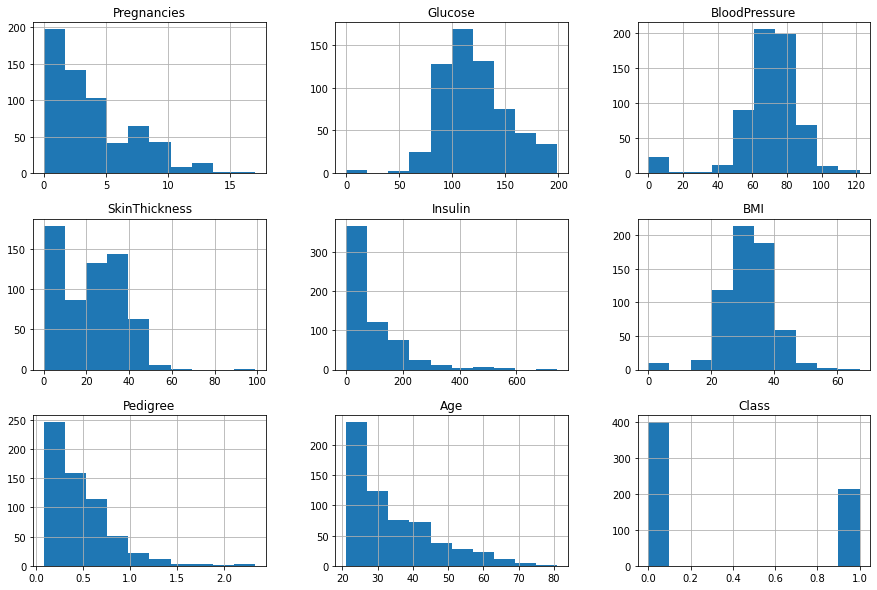

In [41]:
df_train.hist(figsize=(15, 10));


In [42]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'Pedigree']

df_train[cols] = df_train[cols].replace(0, np.nan)
df_train.isnull().sum()

Pregnancies        0
Glucose            4
BloodPressure     23
SkinThickness    175
Insulin          290
BMI                9
Pedigree           0
Age                0
Class              0
dtype: int64

In [43]:
mean_val = df_train[cols].mean()
mean_val

Glucose          121.701639
BloodPressure     72.145516
SkinThickness     29.059226
Insulin          149.077160
BMI               32.448926
Pedigree           0.477428
dtype: float64

In [44]:
df_train[cols] = df_train[cols].fillna(mean_val)
df_test[cols] = df_test[cols].fillna(mean_val)

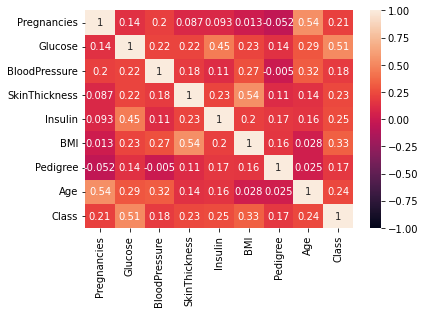

In [45]:
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1);

In [46]:
df_train['Class'].value_counts()

0    400
1    214
Name: Class, dtype: int64

In [47]:
x_train, y_train = df_train.drop(['Class'], axis=1), df_train['Class']
x_test, y_test = df_test.drop(['Class'], axis=1), df_test['Class']


In [48]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [49]:
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.453087
         Iterations 6


In [50]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.2992
Time:                        14:34:50   Log-Likelihood:                -278.20
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 7.463e-47
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.9591      0.955    -10.424      0.000     -11.832      -8.087
Pregnancies       0.1163      0.037      3.113      0.002       0.043       0.190
Glucose           0.0399      0.005     

### Interpretação dos Resultados da Regressão Logística

Vamos interpretar cada parte dos resultados da regressão logística fornecidos.

#### 1. **Informações Gerais**
- **Dep. Variable**: `Class` (a variável dependente, ou seja, a classe do paciente, indicando se tem ou não diabetes).
- **No. Observations**: `614` (o número total de observações/pacientes).
- **Model**: `Logit` (modelo de regressão logística).
- **Df Residuals**: `605` (graus de liberdade dos resíduos).
- **Df Model**: `8` (graus de liberdade do modelo, que corresponde ao número de variáveis independentes).
- **Method**: `MLE` (Máxima Verossimilhança, o método usado para ajustar o modelo).
- **Date**: `Sat, 25 May 2024` (data em que o modelo foi ajustado).
- **Time**: `14:34:50` (hora em que o modelo foi ajustado).
- **Pseudo R-squ.**: `0.2992` (pseudo R-quadrado, uma medida da qualidade do ajuste do modelo. Embora não seja diretamente comparável ao R-quadrado da regressão linear, um valor maior indica um melhor ajuste).
- **Log-Likelihood**: `-278.20` (log-verossimilhança do modelo ajustado).
- **converged**: `True` (indica que o algoritmo de otimização convergiu).
- **LL-Null**: `-396.97` (log-verossimilhança do modelo nulo, ou seja, um modelo sem variáveis independentes).
- **LLR p-value**: `7.463e-47` (valor p do teste de razão de verossimilhança, que compara o modelo ajustado com o modelo nulo. Um valor muito pequeno indica que o modelo ajustado é significativamente melhor do que o modelo nulo).

#### 2. **Coeficientes das Variáveis**
A tabela de coeficientes fornece os seguintes detalhes para cada variável:

- **coef**: O coeficiente estimado para a variável.
- **std err**: O erro padrão do coeficiente.
- **z**: O valor z (coef / std err).
- **P>|z|**: O valor p para o teste de hipótese de que o coeficiente é diferente de zero.
- **[0.025, 0.975]**: Intervalo de confiança de 95% para o coeficiente.

Vamos interpretar cada variável:

- **const**: 
  - **coef**: `-9.9591` (intercepto do modelo).
  - **P>|z|**: `0.000` (altamente significativo).
  - Indica que, sem nenhuma das variáveis independentes, o log-odds de ter diabetes é muito baixo.

- **Pregnancies**:
  - **coef**: `0.1163`.
  - **P>|z|**: `0.002` (significativo).
  - Gravidez aumenta ligeiramente a probabilidade de diabetes.

- **Glucose**:
  - **coef**: `0.0399`.
  - **P>|z|**: `0.000` (altamente significativo).
  - Níveis mais altos de glicose aumentam significativamente a probabilidade de diabetes.

- **BloodPressure**:
  - **coef**: `-0.0039`.
  - **P>|z|**: `0.684` (não significativo).
  - A pressão arterial não mostra uma associação significativa com a probabilidade de diabetes.

- **SkinThickness**:
  - **coef**: `0.0022`.
  - **P>|z|**: `0.883` (não significativo).
  - A espessura da pele não mostra uma associação significativa com a probabilidade de diabetes.

- **Insulin**:
  - **coef**: `-0.0006`.
  - **P>|z|**: `0.680` (não significativo).
  - Os níveis de insulina não mostram uma associação significativa com a probabilidade de diabetes.

- **BMI**:
  - **coef**: `0.1028`.
  - **P>|z|**: `0.000` (altamente significativo).
  - Um índice de massa corporal (BMI) mais alto aumenta significativamente a probabilidade de diabetes.

- **Pedigree**:
  - **coef**: `0.7076`.
  - **P>|z|**: `0.035` (significativo).
  - Um pedigree mais alto (história familiar de diabetes) aumenta significativamente a probabilidade de diabetes.

- **Age**:
  - **coef**: `0.0126`.
  - **P>|z|**: `0.229` (não significativo).
  - A idade não mostra uma associação significativa com a probabilidade de diabetes.

### Conclusão
- O modelo de regressão logística mostra que algumas variáveis (Gravidez, Glicose, BMI e Pedigree) são significativas para prever a probabilidade de diabetes, enquanto outras (Pressão Arterial, Espessura da Pele, Insulina e Idade) não são significativas no nível de significância de 5%.
- O pseudo R-quadrado de 0.2992 sugere que o modelo explica aproximadamente 29.92% da variabilidade nos dados, o que é razoável para um problema médico.
- O valor p do teste de razão de verossimilhança é extremamente baixo, indicando que o modelo ajustado é significativamente melhor do que o modelo nulo.

Essas interpretações ajudam a entender quais fatores são mais relevantes na determinação da probabilidade de diabetes entre os pacientes analisados.

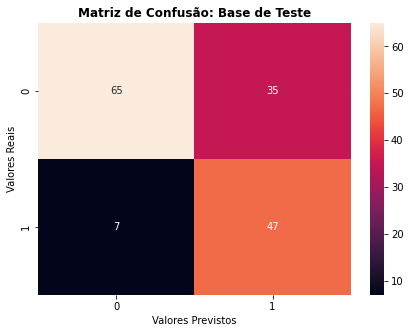

In [79]:
# Realiza as predições na base de treino
# O limiar de classificação padrão é 0.5
pred_test = lg.predict(x_test) > 0.25
pred_test = np.round(pred_test)
 
# Gera a Matriz de Confusão
cm = confusion_matrix(y_test, pred_test)
 
# Plot da Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Matriz de Confusão: Base de Teste', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

In [81]:
# Acurácia
acc = accuracy_score(y_test, pred_test)
# Precisão
prec = precision_score(y_test, pred_test)
# Recall
rec = recall_score(y_test, pred_test)

print(f'Acurácia na base de teste: {round(acc, 2) * 100}%')
print(f'Precisão na base de teste: {round(prec, 2) * 100}%')
print(f'Recall na base de teste: {round(rec, 2) * 100}%')
print(f'F1-Score na base de teste: {round((2*prec*rec)/(prec+rec),2)*100}%')

Acurácia na base de teste: 73.0%
Precisão na base de teste: 56.99999999999999%
Recall na base de teste: 87.0%
F1-Score na base de teste: 69.0%
